# 2025/04/14 - Ch 3 Classif ML modeling - MNIST small images of digits - predicting digit

## 2025/04/14 - MNIST dataset is incredibly common - "Hello World" of ML studies.

#### 2025/04/14 - Sklearn has helper fns to download popular datasets, including MNIST dataset. Fetch data and check data and target size.

In [2]:
from sklearn.datasets import fetch_openml

#2025/04/14 - Interesting - a Bunch object can be used like a dictionary, where accessing values can be accessed by key in the same format as Pandas columns.
#2025/04/14 - Data loaded by sklearn typically have keys "DESCR" (describes dataset), "data" (array with 1 row per instance and one column per feature), and "target" (array with labels).
mnist = fetch_openml('mnist_784', version=1)

In [3]:
print(type(mnist))
print(mnist.keys())
print(mnist["target"][:5])

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [4]:
print(mnist["data"][:2])

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 784 columns]


In [5]:
#2025/04/14 - When pulled out of the Bunch opbject, MNIST data is already Pandas (not numpy).
X, y = mnist["data"], mnist["target"]
print(type(X), type(y))
print("data shape:", X.shape, "target shape", y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
data shape: (70000, 784) target shape (70000,)


In [6]:
print(type(X.loc[0]))
display(X.loc[0])

<class 'pandas.core.series.Series'>


pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

#### 2025/04/14 - There are 70k images with 784 (28x28) pixels (features), ranging 0 (white) - 255 (black). Visualize one digit - pull feature fector and reshape to 28x28 array using Matplotlib's imshow()

In [7]:
import matplotlib.pyplot as plt #Don't need fancy color specs, so no need for full mpl library.
import numpy as np

def plot_digit(pd_dig, ax=None):
    """ X_digit is a single Pandas DataFrame row of 784 pixel data. In this function, it is converted to a numpy array, reshaped to be a 28x28 pixel array, and displayed
        using matplotlib's imshow function with binary coloring for black number and white background. """

    # Create new axis if none provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(2, 2))

    np_dig = pd_dig.to_numpy() #Reshape applies only to numpy arrays
    np_dig_img = np_dig.reshape(28,28) 

    # ax = plt.gca()

    ax.imshow(np_dig_img, cmap="binary")
    ax.axis("off")


5 <class 'str'>


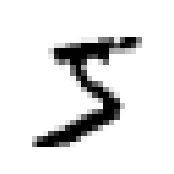

In [8]:

sample_digit_5 = X.iloc[0:1] 

plot_digit(sample_digit_5)

print(y[0], type(y[0])) #target is 5, and handwriting looks visually like a 5 when displaying corresponding pixel features.

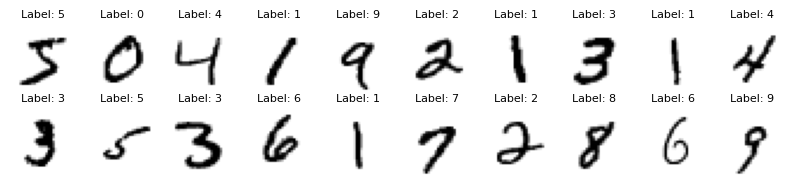

In [9]:
#2025/04/14 - Plot out several digits at once. Normally should only view train data, and not look at test data. 
# MNIST is already split into training (first 60k) and test (last 10k), so looking at any data in first 60k doesn't increase data-snooping bias.

# Define number of rows and columns for subplot grid
num_rows = 2
num_cols = 10
num_images = num_rows * num_cols

# Get first 'num_images' images from the dataset
images = X.iloc[:num_images]
labels = y.iloc[:num_images]

# Create figure and grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(1 * num_cols, 1 * num_rows))

# Iterate over images and plot in subplots
for i in range(num_images):
    ax = axes[i // num_cols, i % num_cols] # Get current subplot (// = floor, % = mod)
    plot_digit(images[i:i+1], ax)
    ax.set_title(f"Label: {labels[i]}", fontsize=8) # Subplot titles for verification

#### 2025/04/14 - Since target is a string, and most ML algos work expect numerical values, cast target to integer

In [10]:
#2025/04/14 - For most memory-efficient storage of integer digits, target integers range from 0-255. 
# Unsigned (>=0) integer with 8 bits (2^8=256) stores values 0-255 without extra digit potential storage.
# More important in large-scale data work and data storage to reduce application cost.
print(y.dtype)
y = y.astype(np.uint8)
print(y.dtype)

category
uint8


### 2025/04/14 - Split data into train and test to limit data-snooping bias while inspecting data.

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


## 2025/04/14 - Training binary classifier (simplified problem - identify 5 and not-5)

In [12]:
#2025/04/14 - Create boolean (T/F) of target dependent on target = 5.
y_train_5 = (y_train == 5)
print(type(y_train_5))
display(y_train_5[0:2])
y_test_5 = (y_test == 5)

<class 'pandas.core.series.Series'>


0     True
1    False
Name: class, dtype: bool

In [13]:
#2025/04/14 - Starting with Stochastic Gradient Descent (SGD) classifier. 
# Pro: handles large data efficiently - trains instances independently, one at a time, making SGD more viable in online learning.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

#### 2025/04/16 - Below user warning can be mitigated by ensuring input data to prediction is a Pandas DataFrame instead of a Numpy array. Tried this and got a dimension issue. Would need to further troubleshoot, but likely simple solution.

In [14]:
print(sgd_clf.predict(sample_digit_5))

sample_digit_0 = X.iloc[1:2]

print(sgd_clf.predict(sample_digit_0))

[ True]
[False]


## 2025/04/14 - Classification performance measures

### 2025/04/14 - Model ACCURACY using cross-validation (ensures model performance measured against hold-out set)

In [15]:
from sklearn.model_selection import cross_val_score

#2025/04/14 - Start simple - how accurate, identifying positives and negatives properly (5s and non-5s), is our model?
cross_val_accuracies = cross_val_score(sgd_clf, X_train ,y_train_5, cv=3, scoring="accuracy")

In [16]:
print("{:.2f}".format(np.mean(cross_val_accuracies)), "{:.4f}".format(np.std(cross_val_accuracies)))

0.96 0.0047


#### 2025/04/14 - 96% accuracy looks good, however given 10 evenly frequent digits, we expect a "dumb" classifier of guessing always "not-5" to have about 90% accuracy (skewed class data). Check.

In [17]:
from sklearn.dummy import DummyClassifier

# Create DummyClassifier which always predicts class 0 (False)
dummy_clf = DummyClassifier(strategy='constant', constant=0)

cross_val_dummy_accuracies = cross_val_score(dummy_clf, X_train,y_train_5, cv=3, scoring="accuracy")

In [18]:
print("{:.2f}".format(np.mean(cross_val_dummy_accuracies)), "{:.4f}".format(np.std(cross_val_dummy_accuracies)))

0.91 0.0000


### 2025/04/14 - Accuracy not enough in classification. Look to CONFUSION MATRIX (PRECISION, RECALL).

#### 2025/04/14 - For classification, it's illuminating to consider accuracy of positive predictions, i.e. "PRECISION", and percentage of positives properly identified, i.e. the true-positive rate or "RECALL." A CONFUSION MATRIX presents the counts of accurately (TRUE) and not-accurately (FALSE) class predictions. High precision => low type-1 error (e.g. identifying fraud/cancer/guilt when it isn't present); high recall => can identify a lot of cases we care about.

In [19]:
#2025/04/14 - Can create confusion matrix by running cross validation which returns predictions instead of returning a performance metric.
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) #Single row per observation - model not trained on that fold predicts on it.

#### 2025/04/14 - Confusion matrix layout: row = actual class, col = predicted class.
1. Row & Col 1 = Negative class; -> [1,1] = True negatives (TN)
2. Row & Col 2 = Positive class; -> [2,2] = True positives (TP)
                                 -> [1,2] = False negatives (FN)
                                 -> [2,1] = False positives (FP)

In [20]:
from sklearn.metrics import confusion_matrix
import pandas as pd

print(confusion_matrix(y_train_5, y_train_pred))

#2025/04/14 - Example of perfect confusion matrix (no off-diagonal values) - better classifiers minimize off-diagonal percentage.
y_train_perfect_preds = y_train_5
print(y_train_perfect_preds[:2])
print(confusion_matrix(y_train_5, y_train_perfect_preds))

[[53892   687]
 [ 1891  3530]]
0     True
1    False
Name: class, dtype: bool
[[54579     0]
 [    0  5421]]


#### 2025/04/14 - Confusion matrix can be interesting to consider - however we care that our classifiers more directly do the following:
1. Successfully identify a large coverage of cases (HIGH RECALL); and
2. Have strong confidence when we do predict the case to exist (e.g. if we predict fraud, ideally it's correct in being fraud) (HIGH PRECISSION)

In [21]:
#2025/04/14 - What is the precision and recall of our classifier?
from sklearn.metrics import precision_score, recall_score

print("Classifier precision:", precision_score(y_train_5, y_train_pred))
print("Classifier recall:", recall_score(y_train_5, y_train_pred))

Classifier precision: 0.8370879772350012
Classifier recall: 0.6511713705958311


#### 2025/04/14 - Our 5-classifier seems mediocre - catches 65% of the cases (recall), and we have about 84% confidence in our positive identification being correct. We can try other models later.

#### 2025/04/14 - Since we care about both precision and recall, it's reasonable to put them both into a metric we try to optimize by picking models/parameters. The harmonic mean of both, called the F1 score, does this, as it penalizes marginal decreases more than marginal increases, i.e. penalizing low values more than rewarding high values.

In [22]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_train_pred))

0.7325171197343847


#### 2025/04/14 - Due to F1's design, it prioritizes classifiers with more equal precision and recall. In some cases, we prioritize precision (things with higher cost if wrong, e.g. "safe-for-kids" video identification, cancer diagnoses, predicting an object to be a person, etc.), and in others we prioritize recall (e.g. shoplifting, initial health screenings, search and rescue, "harmful" material identification, credit-card fraud detection, cybersecurity intrusion, etc.)

### 2025/04/14 - Precision/Recall Trade-Off

#### 2025/04/14 - Each classifier has a decision threshold and prediction scores for each observation; whenever prediction score > threshold -> predict True; o.w. False. With sklearn, can't change classifiers' decision thresholds directly. But can see this change by hand.

In [23]:
y_score_sample_dig = sgd_clf.decision_function(sample_digit_5)
print(y_score_sample_dig)
print(sgd_clf.predict(sample_digit_5))

#2025/04/12 - SGDClassifier's default threshold is 0. Should get same prediction.
threshold = 0
y_sample_dig_pred = (y_score_sample_dig > threshold)
print(y_sample_dig_pred)

#2025/04/12 - If we increase threshold, we can see prediction change. I.e. increasing decision threshold decreases recall (and increases precision).
threshold = 8000
y_sample_dig_pred = (y_score_sample_dig > threshold)
print(y_sample_dig_pred)

[2164.22030239]
[ True]
[ True]
[False]


#### 2025/04/14 - Which threshold should we use for our classifiers? One way to visualize this decision process is to plot precision and recall with different score thresholds. First use cross_val_predict to return decision scores and get precision, recall, and thresholds from sklearn's precision_recall_curve.

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [25]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#### 2025/04/14 - Then plot precision and recall as functions of threshold value - clearly see precision/recall tradeoff, and at a threshold value of 0 precision and recall are equated (SGDClassifier uses a decision threshold that maximizes the F1 score by default).

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlim(-50000, 50000)
    plt.ylim(0, 1.005)
    plt.xlabel("Threshold")
    plt.title("Precision vs. Recall Dependence on Classifier Threshold")
    plt.legend(frameon=False, loc='center right', fontsize='large')

    thresh_index = np.abs(thresholds - 8000).argmin()
    thresh_call_out = thresholds[thresh_index]
    precision_call_out = precisions[thresh_index]
    recall_call_out = recalls[thresh_index]

    # Highlight precision and recall points associated with threshold value of 8000.
    plt.plot(thresh_call_out, precision_call_out, 'ro')
    plt.plot(thresh_call_out, recall_call_out, 'ro')

    # Make clearer which precision and recall values correspond to threshold value of 8000 with horizontal lines (and vertical from threshold to precision val)
    plt.plot([thresholds[0], thresh_call_out], [precision_call_out, precision_call_out], 'r:')
    plt.plot([thresholds[0], thresh_call_out], [recall_call_out, recall_call_out], 'r:')
    plt.plot([thresh_call_out, thresh_call_out], [0, precision_call_out], 'r:')

    #2025/04/15 - Remove left and right spines from figure (minimizing chart junk)
    ax = plt.gca()
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)

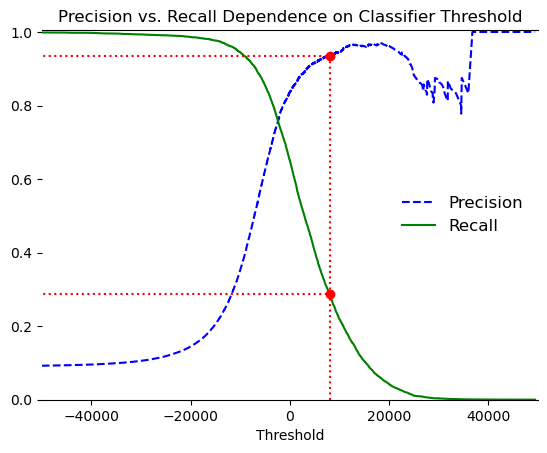

In [27]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) #Precision falls when threshold increase removes a positive case (e.g. 4/5 -> 3/4)

#### 2025/04/15 - Can also look at precision-recall trade-off plotting precision and recall against each other (changes in threshold are what drive this, but not viewable in figure).

In [28]:
from sklearn.metrics import roc_curve, auc #AUC compares area under any curve, so can use to compute ROC AUC and PR AUC.

aupr_sgd = auc(recalls[:-1], precisions[:-1])
print(aupr_sgd)

0.8097980963012832


In [29]:
def plot_precision_vs_recall(precisions, recalls, label="None"):
    plt.plot(recalls[:-1], precisions[:-1], "b-", label = label)
    plt.xlim(0.1, 1.01)
    plt.ylim(0, 1.01)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs. Recall of SGD Classifier")
    plt.plot([1,1], [0,1], 'r--', label="Perfect (AUPR = 1)") #Perfect classifier ROC
    plt.plot([0,1], [1,1], 'r--', label=None) #Perfect classifier ROC
    plt.legend(frameon=False)


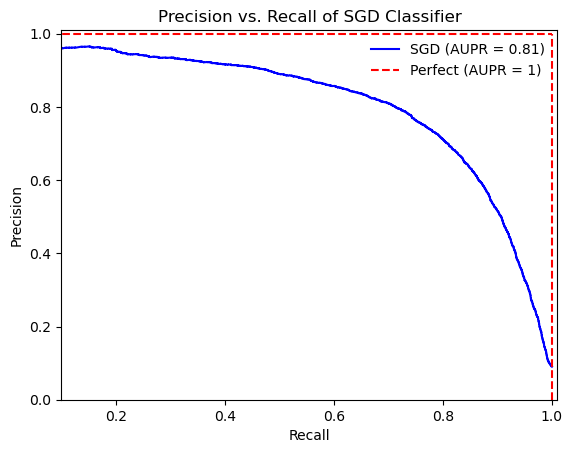

In [30]:
plot_precision_vs_recall(precisions, recalls, label = f"SGD (AUPR = {aupr_sgd:.2f})") # Looks like precision (conf in pos pred) starts falling faster around 80% precision.

#### 2025/04/15 - Ideally in the precision-recall tradeoff, we would have data on the societal/monetary value of the precision-recall tradeoff to guide the decision on what are the "optimal" values of each. E.g. trading off the cost of reduced confidence in positive predictions (lower precision) with the benefit of catching more cases (higher recall).

#### 2025/04/14 - Once deciding on a specific precision, can get predictions aligning with that precision by identifying threshold with that precision and comparing predictor decision scores to identified threshold.

In [31]:
thresh_90_perc = thresholds[np.argmax(precisions >= 0.90)] #Another way to get specific threshold - convert array to bool, and argmax finds 1st max (True) value.

y_train_pred_90 = (y_scores >= thresh_90_perc) #Predictions corresponding to 90% precision.

#Verify precision and recall with 90% precision.
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


### 2025/04/15 - Another classifier perf metric - ROC Curve (receiver operating characteristic)

#### 2025/04/15 - ROC similar to P-R curve; ROC plots true-positive rate (recall) vs false-positive rate (FPR - ratio of negative cases classified positive). Another wording for this is plotting "sensitivity" (recall) versus 1 - "specificity" (1 - true-negative rate; FPR = 1-TNR).

#### 2025/04/15 - Want a dummy classifier for comparison to our classifier and perfect classifier - will be clear when AUC discussed a little lower. Dummy classifier in ROC sense randomly predicts scores between the min and max threshold score.

In [32]:
y_scores_random = np.random.rand(len(y_train_5))

#Don't need thresholds for random/dummy classifier as it's only being plotted in PR and ROC figures.
fpr_rand, tpr_rand, _ = roc_curve(y_train_5, y_scores_random)
auc_rand = auc(fpr_rand, tpr_rand)

#### 2025/04/15 - Plot ROC curve by getting array of values for ROC curve, FPR, TPR, and thresholds (thresholds not plotted).

In [33]:
#2025/04/15 - For different threshold values applied to prediction scores, calculate the false-positive and true-positive rates.
fpr_sgd, tpr_sgd, _ = roc_curve(y_train_5, y_scores)
auc_sgd = auc(fpr_sgd, tpr_sgd)

In [34]:
#2025/04/15 - Create function to plot ROC curve.

def plot_roc_curve(fpr, tpr, fpr_rand, tpr_rand, auc_rand, label="Classifier"):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,0], [0,1], 'r--', label="Perfect (AUC = 1)") #Perfect classifier ROC
    plt.plot([0,1], [1,1], 'r--', label=None) #Perfect classifier ROC

    plt.plot(fpr_rand, tpr_rand, 'k--', label=f'Random (AUC = {auc_rand:.2f})')

    plt.xlabel("False-Positive Rate")
    plt.ylabel("True-Positive Rate (Recall)")
    plt.title("ROC curve for MNIST Binomial Classifier (5 = True, o.w. False)")
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.legend(frameon = False)

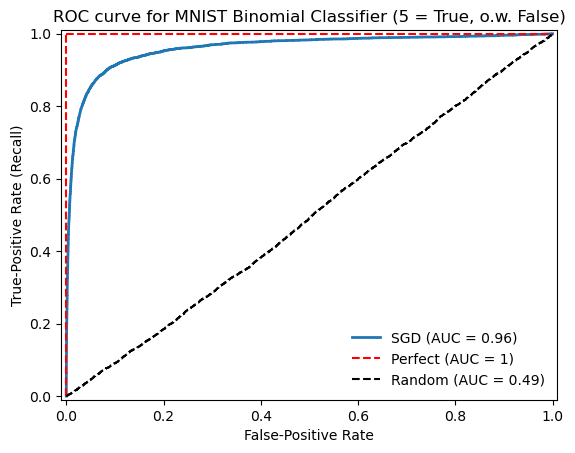

In [35]:
plot_roc_curve(fpr_sgd, tpr_sgd, fpr_rand, tpr_rand, auc_rand, label = f"SGD (AUC = {auc_sgd:.2f})")

#### 2025/04/15 - When comparing classifiers, depending on threshold one could appear better than another. Can look for classifiers which on average, across all thresholds, perform better. These are classifiers with higher area under the curve (AUC), specifically ROC AUC. In more skewed data (positive case rare) ROC PR can perform better than ROC AUC. In this case the ROC AUC makes SGD seem really good (AUROC = 0.96), however, since data is skewed (only 10% positive cases in data), PR AUC shows SGD has room for improvement (AUPR = 0.81).

### 2025/04/15 - Add 2nd classifier and compare on performance metrics (ROC AUC and AUPR) - Random Forest Classifier

#### 2025/04/15 - RandomForestClassifier stores probabilities of belonging to a class. Work with those to plot PR and ROC curves, and calculate ROC AUC and AUPR.

In [36]:
#2025/04/15 - Train random forest classifier and get predictions (likelihood of belonging to either class).
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


In [37]:
#2025/04/15 - Get false-positive and true-positive rates using roc_curve()
y_scores_forest = y_probas_forest[:, 1] #score = probability of belonging to positive class (i.e. prob of being a 5)
fpr_forest, tpr_forest, _ = roc_curve(y_train_5, y_scores_forest)
auc_forest = auc(fpr_forest, tpr_forest)

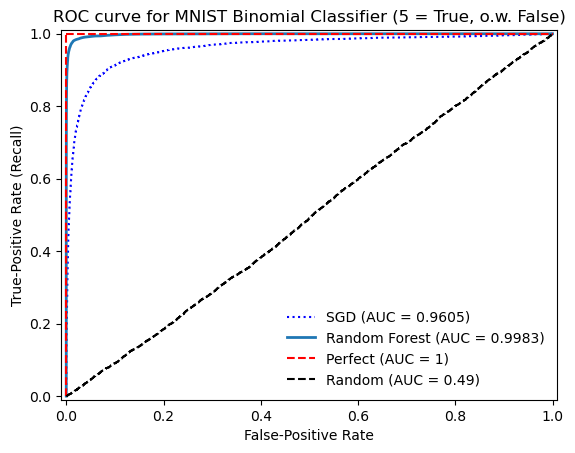

In [38]:
#2025/04/15 - Plot random forest and SDG ROC curves.
plt.plot(fpr_sgd, tpr_sgd, "b:", label = f"SGD (AUC = {auc_sgd:.4f})")
plot_roc_curve(fpr_forest, tpr_forest, fpr_rand, tpr_rand, auc_rand, label = f"Random Forest (AUC = {auc_forest:.4f})")

In [39]:
precs_forest, recalls_forest, _ = precision_recall_curve(y_train_5, y_scores_forest)
aupr_forest = auc(recalls_forest[:-1], precs_forest[:-1])
print(aupr_forest)

0.9664217441735684


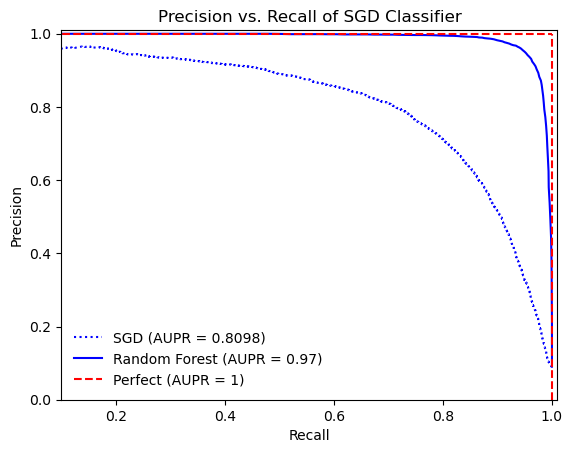

In [40]:
#2025/04/15 - Plot random forest and SDG AUPR curves.
plt.plot(recalls[:-1], precisions[:-1], "b:", label = f"SGD (AUPR = {aupr_sgd:.4f})")
plot_precision_vs_recall(precs_forest, recalls_forest, label = f"Random Forest (AUPR = {aupr_forest:.2f})")

#### 2025/04/15 - Considering both ROC AUC and AUPR, a default random forest classifier performs noticably better than a default SGD classifier.

## 2025/04/15 - Multiclass (Multinomial) Classification (single outcome, multiple class values)

#### 2025/04/16 - Several ML classification methods handle multiple classes in target natively (e.g. logistic regression, random forest, and naive Bayes), while others strictly handle binary classes (e.g. SGD and support vector machines (SVMs)).

### 2025/04/16 - There are 2 ways to use binary classifiers to handle multiclass problems:
1. OvR/A (one-versus-the-rest/all) - fit one binary classifier for each class (K) vs the others (e.g. for MNIST fit 10 binary models). To make prediction, get decision score from each binary classifier, and select class of classifier outputing highest score.
2. OvO (one-versus-one) - train binary classifier for every pair of digits (e.g. 0 vs 1, 0 vs 2, 1 vs 2, etc.). Results in K*(K-1)/2 classifiers to fit. To make prediction, each model decision score is compared to the others and the # of "duels" is recorded. The class of the classifier with most won duels is what is predicted.

OvO/OvR tradeoff: OvO is only trained on part of the training set for the 2 classes it must distinguish. Better for methods which scale poorly with more data (e.g. SVM). For most others, OvR is preferred. OvO can perform better in imbalanced data, as 1-vs-1 duels might have more balanced target data. Training data balancing can remove this worry for OvR. Also highly separable classes perform well in OvO. But if classes don't have clear boundaries (e.g. logistic and SVMs perform poorly), then OvR performs better by having more data to pick up more complicated boundary conditions.

### 2025/04/16 - Try out 2 binary classifiers, SVM and SGD, and try out forcing OvO and OvR results.

In [41]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train) #training on target including all classes.

SVC()

In [42]:
print(svm_clf.predict(sample_digit_5), svm_clf.predict(sample_digit_0)) #2025/04/16 - Correct predictions

[5] [0]


#### 2025/04/16 - SVM defaults to OvO, so let's ensure decision scores are # duels won - with small tweaks to break ties.

In [43]:
sample_digit_5_scores = svm_clf.decision_function(sample_digit_5)
print(svm_clf.decision_function(sample_digit_5))
print(np.argmax(sample_digit_5_scores))

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
5


In [44]:
#2025/04/16 - 5th index won. Can identify class from index looking at the classifier's class attribute. For MNIST class ID and class # align perfectly - not likely in other problems.
print(svm_clf.classes_)
print(svm_clf.classes_[5])

[0 1 2 3 4 5 6 7 8 9]
5


#### 2025/04/16 - Can force a strict binary classifier to use another multiclass method

In [45]:
# 2025/04/16 - Note difference in SVM multiclass fit - OvO = 3m 34s; OvR > 16m - stopped running to limit runtime
# from sklearn.multiclass import OneVsRestClassifier
# ovr_svm_clf = OneVsRestClassifier(SVC())
# ovr_svm_clf.fit(X_train, y_train)

In [46]:
# print(ovr_svm_clf.predict(sample_digit_5))
# print(len(ovr_svm_clf.estimators_))

#### 2025/04/16 - Can also train SGD in the same manner

In [47]:
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict(sample_digit_5)) #SGD may sometimes mix up 3 and 5 - admittedly this 5 does look pretty close to a 3 visually.

[3]


#### 2025/04/16 - Verify OvR performed by looking at decision-function scores and see threshold values instead of duel's won values.

In [48]:
sgd_clf.decision_function(sample_digit_5)

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

#### 2025/04/16 - Quick evaluation of SVM multiclass classifier performance and simple improvement scaling features (pixels) - different variance in pixel coverage, e.g. most numbers may be handdrawn over the same pixel, while other pixels (features) may only get picked up by 1 number - also intensity may differ commonly on a pixel due to where a number starts, ends, or is in the middle.

In [49]:
#2025/04/16 - Using more time-efficient SVM to limit cross-val runtime.
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))

[0.87365 0.85835 0.8689 ]


In [50]:
#2025/04/16 - Std dev scaling appears to improve accuracy between 2-6 percentage points.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy"))

[0.8983 0.891  0.9018]


### 2025/04/16 - Multilabel Classification Error Analysis

#### 2025/04/16 - In a real project, would have already considered more data preparation, more models, tuned hyperparameters, and increased automation. Let's assume we've already done that and consider multilabel classification modeling errors.

#### 2025/04/16 - Start with a multilabel confusion matrix - lots of numbers (due to many classes) - can also plot for faster visual inspection using matplotlib's matshow() fn.

In [51]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [52]:
print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


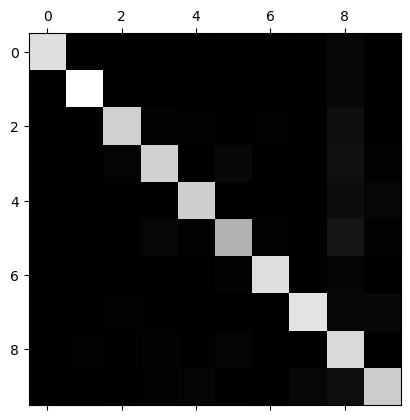

In [53]:
plt.matshow(conf_mx, cmap = plt.cm.gray)

#### 2025/04/16 - It looks like the frequency of the 5 class being predicted as a 5 is a little lower than other numbers. Check percentage of each number predicted over that numbers total class existence for a better understanding of which numbers are being confused.

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

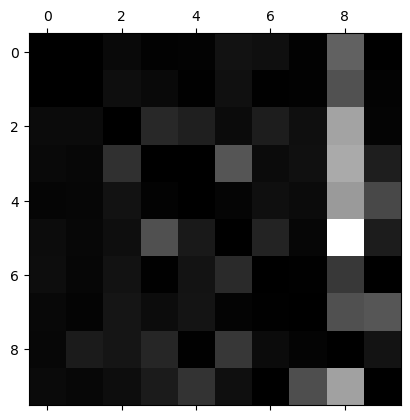

In [55]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

#### 2025/04/16 - Lighter values indicate higher frequency, thus 5s are being mispredicted more so as 3s and 8s. Let's visually inspect some of these errors where 5s are predicted as 3s and vice versa.

In [56]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [57]:
import matplotlib.gridspec as gridspec

#2025/04/16 - Figure creation design - function plots within each grid, being passed grid to plot in using GridSpec.
def plot_digits(gs_inset, images):
    """plot_digits() plots as many digits as are passed as rows in images Pandas DataFrame in structure passed in gridSpec inset"""
    for i in range(len(images)):
        ax = fig.add_subplot(gs_inset[i])
        plot_digit(images[i:i+1], ax)

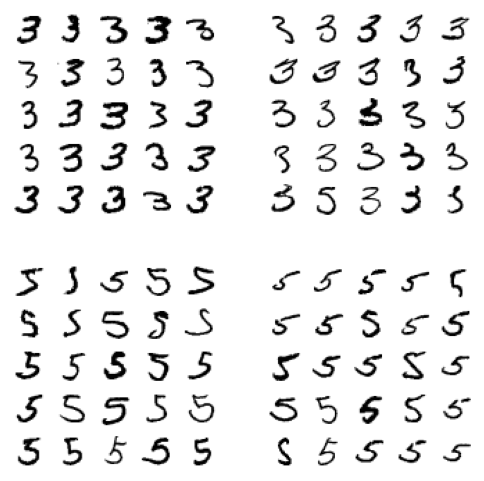

In [58]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2, 2, figure=fig)

gs_inset_1 = gridspec.GridSpecFromSubplotSpec(5, 5, subplot_spec=gs[0, 0], wspace=0.1, hspace=0.1)
plot_digits(gs_inset_1, X_aa[:25])

gs_inset_2 = gridspec.GridSpecFromSubplotSpec(5, 5, subplot_spec=gs[0, 1], wspace=0.1, hspace=0.1)
plot_digits(gs_inset_2, X_ab[:25])

gs_inset_3 = gridspec.GridSpecFromSubplotSpec(5, 5, subplot_spec=gs[1, 0], wspace=0.1, hspace=0.1)
plot_digits(gs_inset_3, X_ba[:25])

gs_inset_4 = gridspec.GridSpecFromSubplotSpec(5, 5, subplot_spec=gs[1, 1], wspace=0.1, hspace=0.1)
plot_digits(gs_inset_4, X_bb[:25])

#### 2025/04/16 - As we saw in our AUPR/ROC AUC calculations earlier, a more complicated classifier, e.g. Random Forest, would make considerably fewer classification prediction errors.

## 2025/04/16 - Multilabel (Multivariate) Classification

### 2025/04/16 - Although we'll get more into multilabel classifcation later, especially in facial recognition and similar tasks, we can try out a simple version now, e.g. a classifier which predicts if a handwritten number is >= 7 and is odd. Let's use a K-nearest-neighbors classifier to do this.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

y_train_above_6 = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_above_6, y_train_odd] #use numpy to concatenate 2 targets into single variable

knn_multi_clf = KNeighborsClassifier()
knn_multi_clf = knn_multi_clf.fit(X_train, y_multilabel)

In [60]:
print(knn_multi_clf.predict(sample_digit_5))
print(knn_multi_clf.predict(sample_digit_0)) #Correct multilabel predictions

[[False  True]]
[[False False]]


#### 2025/04/16 - Evaluating multilabel classification can be more complicated depending on which outcome we care more about predicting well (and handling class imbalances). One simple method is to compare F1 scores averaged over each label prediction between classifiers (here we'll just calculate for our KNN model).

In [61]:
y_train_knn_pred = cross_val_predict(knn_multi_clf, X_train, y_multilabel, cv=3) #Get predictions across 3 different subset models
print(f1_score(y_multilabel, y_train_knn_pred, average = "macro")) #Macro gets unweighted average over both classes and labels. Could use average = "weighted" to have f1-scores weighted by class and indirectly by label.

0.9764102655606048


## 2025/04/16 - Multioutput (multilabel and multiclass) Classification

### 2025/04/16 - Build simple system which removes noise from images. 
1. Add different random noise to training and test pixel data.
2. Use original training and test pixel data as our targets.
3. View sample noisy and clean training number to see how "noise" visualizes.
3. Fit KNN classifier to this data and view clean digit.

In [62]:
#2025/04/16 - Generate noise for train and test data.
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))

#2025/04/16 - Create noisy train and test feature data.
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test

#2025/04/16 - Store "cleaned" handwritten number pixel representations (target)
y_train_mod = X_train
y_test_mod = X_test

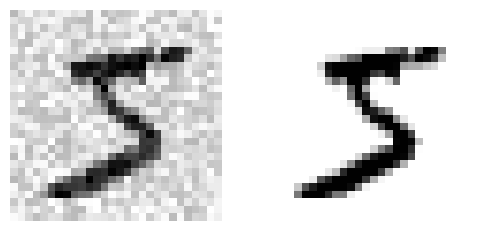

In [ ]:
sample_noisy_digit = X_train_mod[0:1]
sample_clean_digit = y_train_mod[0:1]

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

plot_digit(sample_noisy_digit, axes[0])
plot_digit(sample_clean_digit, axes[1])

In [74]:
print(X_train_mod.shape, y_train_mod.shape)
knn_clean_img_clf = KNeighborsClassifier()
knn_clean_img_clf.fit(X_train_mod, y_train_mod)

(60000, 784) (60000, 784)


KNeighborsClassifier()

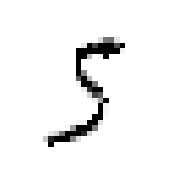

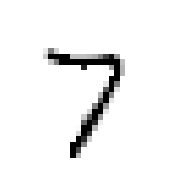

In [ ]:
clean_digit_train = knn_clean_img_clf.predict(X_train_mod[0:1])
clean_digit_test = knn_clean_img_clf.predict(X_test_mod[0:1])

plot_digit(pd.DataFrame(clean_digit_train))
plot_digit(pd.DataFrame(clean_digit_test))